# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
## Keras Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
## Accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## 1) Load Data

In [27]:
df = pd.read_csv('/content/creditcard.csv')

# Display Data

In [28]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Check Null Values

In [29]:
df.isnull().sum()  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 3) Split Dataset

In [30]:
X=df.drop(['Amount','Time','Class'],axis=1)
y=df['Class']

## Normalization

In [31]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

##  50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) 

## Data is so imbalance so we will use Balancing Technique

In [33]:
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [34]:
loan = Sequential()
loan.add(Dense(10, input_shape=(28,), activation='relu')),
loan.add(Dropout(0.2)),
loan.add(Dense(8, activation='relu')),
loan.add(Dropout(0.2)),
loan.add(Dense(6, activation='relu')),
loan.add(Dropout(0.2)),
loan.add(Dense(1, activation='sigmoid'))

## Binary So Using Binary Crossentropy Loss and Optimzer = Adam

In [35]:
loan.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

## Train

In [36]:
history = loan.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_val, y_val))

Epoch 1/100
45482/45482 [==============================] - 61s 1ms/step - loss: 0.2599 - accuracy: 0.8936 - val_loss: 0.0856 - val_accuracy: 0.9817
Epoch 2/100
45482/45482 [==============================] - 61s 1ms/step - loss: 0.1828 - accuracy: 0.9282 - val_loss: 0.0520 - val_accuracy: 0.9877
Epoch 3/100
45482/45482 [==============================] - 60s 1ms/step - loss: 0.1765 - accuracy: 0.9296 - val_loss: 0.1071 - val_accuracy: 0.9771
Epoch 4/100
45482/45482 [==============================] - 61s 1ms/step - loss: 0.1676 - accuracy: 0.9334 - val_loss: 0.0931 - val_accuracy: 0.9862
Epoch 5/100
45482/45482 [==============================] - 61s 1ms/step - loss: 0.1634 - accuracy: 0.9351 - val_loss: 0.0831 - val_accuracy: 0.9831
Epoch 6/100
45482/45482 [==============================] - 61s 1ms/step - loss: 0.1611 - accuracy: 0.9346 - val_loss: 0.1406 - val_accuracy: 0.9664
Epoch 7/100
45482/45482 [==============================] - 61s 1ms/step - loss: 0.1598 - accuracy: 0.9349 - val_

## Prediction

In [37]:
pred = loan.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Evaluation

## 99% Accuracy

In [38]:
results = loan.evaluate(X_test,y_test)
print('Test accuracy: ', results[1]*100)

4451/4451 [==============================] - 5s 1ms/step - loss: 0.0608 - accuracy: 0.9745
Test accuracy:  97.44670391082764


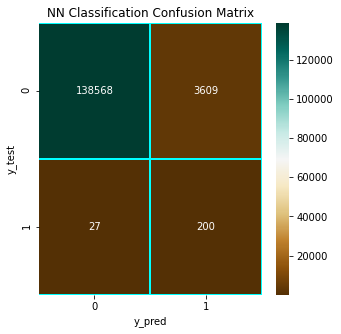

In [39]:
# Creating the confusion matrix:
cm = confusion_matrix(y_test, pred)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('NN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    142177
           1       0.05      0.88      0.10       227

    accuracy                           0.97    142404
   macro avg       0.53      0.93      0.54    142404
weighted avg       1.00      0.97      0.99    142404

